In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
SEED=1
import os
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] =str(SEED) 
os.environ['TF_CUDNN_DETERMINISTIC']=str(SEED)
tf.config.threading.set_inter_op_parallelism_threads(SEED)
tf.config.threading.set_intra_op_parallelism_threads(SEED) 
import random
random.seed(SEED)
import numpy as np
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data() 

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
y_label_train=y_label_train.reshape(-1)
y_label_test=y_label_test.reshape(-1)

In [ ]:
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3) labels: (50000,)
test  data: images: (10000, 32, 32, 3)  labels: (10000,)


In [ ]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_label_train_OneHot = utils.to_categorical(y_label_train)
y_label_test_OneHot = utils.to_categorical(y_label_test)

In [ ]:
print("train data:",'images:',x_img_train_normalize.shape,
   " labels:",y_label_train_OneHot.shape) 
print("test  data:",'images:',x_img_test_normalize.shape ,
   " labels:",y_label_test_OneHot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Activation, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(
    filters=32,kernel_size=(3,3),input_shape=(32, 32,3), 
    activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(
    filters=64, kernel_size=(3, 3), 
    activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(
    filters=128, kernel_size=(3, 3), 
    activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
train_history=model.fit(
    x_img_train_normalize,y_label_train_OneHot,
    validation_split=0.2,epochs=20,batch_size=200,verbose=1)          

Epoch 1/20
200/200 [==============================] - 16s 14ms/step - loss: 1.6714 - acc: 0.3925 - val_loss: 1.4156 - val_acc: 0.4949
Epoch 2/20
200/200 [==============================] - 2s 12ms/step - loss: 1.2716 - acc: 0.5494 - val_loss: 1.1947 - val_acc: 0.5847
Epoch 3/20
200/200 [==============================] - 2s 12ms/step - loss: 1.1078 - acc: 0.6107 - val_loss: 1.0861 - val_acc: 0.6261
Epoch 4/20
200/200 [==============================] - 2s 12ms/step - loss: 0.9857 - acc: 0.6589 - val_loss: 0.9895 - val_acc: 0.6577
Epoch 5/20
200/200 [==============================] - 2s 12ms/step - loss: 0.8957 - acc: 0.6885 - val_loss: 0.9310 - val_acc: 0.6816
Epoch 6/20
200/200 [==============================] - 2s 12ms/step - loss: 0.8330 - acc: 0.7116 - val_loss: 0.9438 - val_acc: 0.6769
Epoch 7/20
200/200 [==============================] - 3s 13ms/step - loss: 0.7666 - acc: 0.7337 - val_loss: 0.8744 - val_acc: 0.7007
Epoch 8/20
200/200 [==============================] - 3s 13ms/step -

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

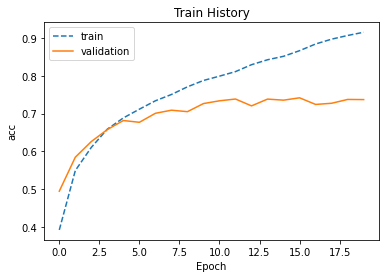

In [ ]:
show_train_history(train_history,'acc','val_acc')

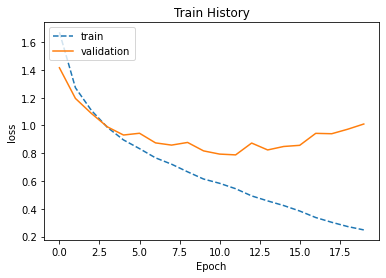

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot)

313/313 [==============================] - 2s 4ms/step - loss: 1.0356 - acc: 0.7245


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 1.0356391668319702 test_acc= 0.7245000004768372


# 進行預測

In [ ]:
probability=model.predict(x_img_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [ ]:
prediction[:10]

array([3, 8, 8, 0, 4, 6, 1, 2, 3, 1])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

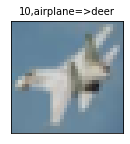

In [ ]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,idx=10,num=1)

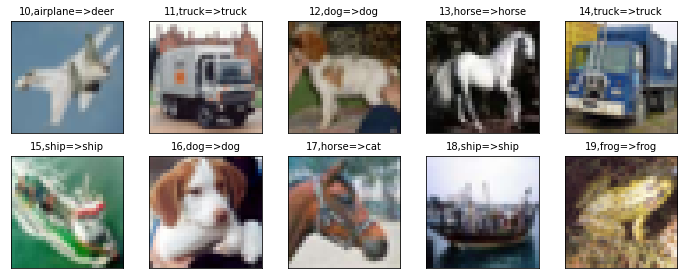

In [ ]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
    images,
    labels,
    prediction,
    probability,
    idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  print('label:',label_dict[labels[idx]],
        'predict:',label_dict[prediction[idx]]) 
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

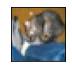

label: cat predict: cat
airplane   Probability:0.000009881
automobile Probability:0.000001095
bird       Probability:0.000030077
cat        Probability:0.747264326
deer       Probability:0.000021267
dog        Probability:0.134006456
frog       Probability:0.000879875
horse      Probability:0.000025054
ship       Probability:0.117080241
truck      Probability:0.000681719


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,0) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
pd.crosstab(y_label_test,prediction,
      rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,723,13,54,27,20,6,14,12,65,66
1,20,782,8,10,5,10,11,3,31,120
2,49,5,640,49,81,60,47,44,11,14
3,21,3,68,502,64,188,79,44,8,23
4,15,3,83,36,683,45,37,83,8,7
5,11,3,50,151,44,652,22,57,4,6
6,2,5,54,43,36,35,800,9,7,9
7,10,3,44,26,53,56,5,788,4,11
8,50,24,13,11,12,11,7,3,822,47


In [ ]:
df = pd.DataFrame({'label':y_label_test, 'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,4


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
33,5,3
178,5,3
212,5,3
230,5,3
262,5,3
...,...,...
9446,5,3
9637,5,3
9649,5,3
9654,5,3


# 查看預測錯誤資料

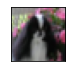

label: dog predict: dog
airplane   Probability:0.000643826
automobile Probability:0.000009993
bird       Probability:0.002292095
cat        Probability:0.014654433
deer       Probability:0.000051140
dog        Probability:0.519319415
frog       Probability:0.000001448
horse      Probability:0.419959515
ship       Probability:0.000019831
truck      Probability:0.043048277


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,42)

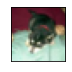

label: dog predict: frog
airplane   Probability:0.009661998
automobile Probability:0.002695928
bird       Probability:0.024402050
cat        Probability:0.328858286
deer       Probability:0.000017676
dog        Probability:0.175230578
frog       Probability:0.456408441
horse      Probability:0.000013578
ship       Probability:0.002622501
truck      Probability:0.000088975


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,128)